In [29]:
# LinearRegression，Ridge，Lasso

import numpy as np

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 50样本，200特征
# 无解：无数个解
X = np.random.randn(50,200)

In [3]:
w = np.random.randn(200)
w

array([-0.79850768, -1.63061541,  0.22944632, -0.67119816,  0.92866164,
        0.39084507,  0.45394825,  0.62264477, -0.32675269,  2.14562661,
       -1.62403658, -0.37416251,  0.38612188,  0.11648301,  0.33352129,
        0.52433826,  0.73921945, -0.22502498,  0.70361391, -0.20009299,
       -2.33506454,  0.97201284,  0.30718459,  0.61544744, -0.60767762,
       -1.09771746,  0.31028823,  0.21256433,  0.28424727, -0.34664456,
        0.81282554,  0.11195611, -1.0319872 ,  0.01382516, -0.43618572,
        0.48088363,  1.57939875, -1.51804667, -1.63206393, -0.60776758,
        1.03887409, -0.91145983,  0.51349918, -0.08402293, -0.69698804,
       -0.75328288, -0.60785297,  0.06656164,  0.05016224,  0.48581108,
        0.40612622, -0.17004851, -0.30487362, -0.61062399, -0.4713842 ,
        1.51581197,  1.29729472, -1.74859692,  1.13494479, -0.03582767,
       -1.62351642,  0.49423022, -0.68516192,  0.25806041, -0.27312313,
        1.17410462, -0.33049834,  0.9055904 , -1.07284107, -1.79

In [5]:
# 将其中的190个置为0
index = np.arange(0,200)
np.random.shuffle(index)
index

array([105, 113,  12, 162, 110,  90,  41, 158, 122,  34, 135, 106,  80,
        31,  61,  64, 170,  79, 180,  88, 189, 147,   9, 118, 196,  15,
        46,  94, 140,   6, 187,  26, 197,  54, 168, 193,  72,  16,  87,
        51,  11, 137,  78,  99, 199, 116, 125, 194,  17, 156, 195,   8,
        85,  23,  33,  69, 102, 198, 112, 109,  40,   4, 100, 119,  86,
       101, 128,  47,  28,  71, 131,  77, 123,  18, 141,  59, 185,  83,
        56, 166, 129,  44,  62,  45, 132,  52,  98,  30, 159,  29, 184,
        32, 191,  10,  58,  75, 108,  76,   0,  92, 124, 176, 111,  36,
       144, 165,  84,  21,  48, 145, 146,   5,  39, 143, 190, 172, 133,
        67,  73, 139, 186,  96, 171,  60,  25, 160, 150, 164,  68, 127,
       161,  24, 149, 148, 142, 154, 153,  37,  53, 181, 103,  63, 192,
        35, 179,  19, 126,   3, 174, 104,  42,  65, 167,  55,  22, 175,
       178,  95, 130,  70, 136,  38, 169,  93, 117, 121,  50,  13, 183,
         2, 120, 138,  82, 163, 173,  57,  43, 177,  49,  89, 13

In [6]:
w[index[:190]] = 0
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -2.33506454,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.21256433,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
y = X.dot(w)
y

array([ 4.47288303,  0.69709328,  1.55183697, -5.02056681,  0.03128829,
        3.08748379, -1.34057388, -0.11148109, -0.50035604,  1.64997387,
       -1.45130012,  3.95985727,  0.12228119, -6.84225811, -4.16882717,
       -5.01947848, -1.11304752,  4.13204272, -3.54105328,  1.44063571,
        3.72990284, -5.27985115,  0.07931552,  7.42377363,  2.44183758,
       -4.07261733, -3.96692163, -0.0744926 ,  0.89978673,  0.31368023,
        7.7712522 , -4.34850951,  7.00105689, -1.43907696,  3.29177744,
        3.88546665, -1.06034495,  2.78925837,  0.90805761, -4.39653607,
       -1.28459054, -2.40297004, -1.49144211,  1.60654492,  4.38452062,
       -8.60662701, -0.60629128,  0.95946423, -1.92407473, -2.78524512])

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
linear = LinearRegression(fit_intercept=False)

ridge = RidgeCV(alphas = [0.001,0.01,0.1,1,2,5,10,20,50,100],cv = 5,fit_intercept=False)

lasso = LassoCV(alphas=[0.001,0.01,0.1,1,2,5,10],cv = 3,fit_intercept=False)

In [34]:
linear.fit(X,y)

ridge.fit(X,y)

lasso.fit(X,y)

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 2, 5, 10], copy_X=True, cv=3, eps=0.001,
        fit_intercept=False, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Text(0.5, 1.0, 'Lasso')

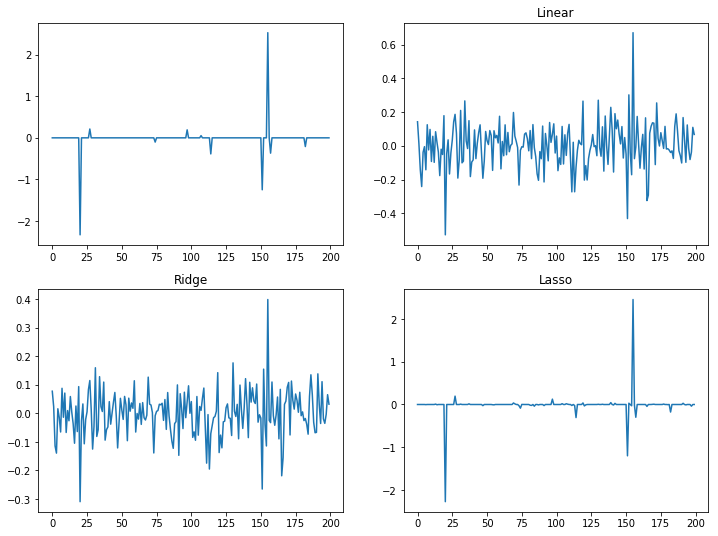

In [35]:
linear_w = linear.coef_

ridge_w = ridge.coef_

lasso_w = lasso.coef_
plt.figure(figsize=(12,9))
axes = plt.subplot(2,2,1)
axes.plot(w)

axes = plt.subplot(2,2,2)
axes.plot(linear_w)
axes.set_title('Linear')

axes = plt.subplot(2,2,3)
axes.plot(ridge_w)
axes.set_title('Ridge')

axes = plt.subplot(2,2,4)
axes.plot(lasso_w)
axes.set_title('Lasso')